In [1]:
import os
import pandas as pd
from Codigo.land_slide.main_sample import create_dataset
pd.set_option('display.max_colwidth', None)

## from Codigo.land_slide.openstreet import load_inventario

In [2]:
create_dataset(   )



Current Time = 27-05-2025 02:02:55


Working in CHIRPS nowcast assigment [...]

15.909 [%] progress
31.818 [%] progress
47.727 [%] progress
63.636 [%] progress
79.545 [%] progress
95.455 [%] progress
Dates complete
Coords are in aligment.
Done

Processing windows one by one to minimize memory usage...
  Processing 3-day rolling statistics...
    Calculating rolling statistics...
    Computing static summaries...
    Mapping to 23123 landslides across 3601 unique grid cells...
    Completed 3-day window and cleared memory
  Processing 7-day rolling statistics...
    Calculating rolling statistics...
    Computing static summaries...
    Mapping to 23123 landslides across 3601 unique grid cells...
    Completed 7-day window and cleared memory
  Processing 15-day rolling statistics...
    Calculating rolling statistics...
    Computing static summaries...
    Mapping to 23123 landslides across 3601 unique grid cells...
    Completed 15-day window and cleared memory
Added 9 precipitation

In [2]:
os.listdir(r"C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\Codigo\cache_results")

['Invenatario_1000_COMPUTED.csv',
 'Invenatario_1500_COMPUTED.csv',
 'Invenatario_2000_COMPUTED.csv',
 'inventario_1000m.shape',
 'inventario_1500m.shape',
 'inventario_2000m.shape',
 'Inventario_raw.csv']

In [15]:

def load_inventario_train(radius_buffer : int):

    path_cache = r"C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\Codigo\cache_results"
    file_open_street = f'Invenatario_{radius_buffer}_COMPUTED.csv'
    
    
    light_cols = [
                  'ID',
                  'Department',
                  'Municipality',
                  'Latitud',
                  'Longitud',
                  'Type',
                  'Cause',
                  'Fecha', 
                  
                  'precip_rollsum_mean_3d', 
                  'precip_rollmean_mean_3d',
                  'precip_rollmax_mean_3d',
                  'precip_rollsum_mean_7d',
                  'precip_rollmean_mean_7d',
                  'precip_rollmax_mean_7d',
                  'precip_rollsum_mean_15d', 
                  'precip_rollmean_mean_15d',
                  'precip_rollmax_mean_15d',
                  
                  'precip_cdw_index', 
                  'precip_rx1day_index',
                  'precip_r95p_index',
                  'precip_aggregated_index',
                  
                  'suceptilibty', 
                  'PGA',
                  'Litologia', 
                  'elevacion_alos', 
                  'elevacion_srtm',
                  'Pendiente_12_5m',
                  'Elevacion_12_5m'
                  ]

    
    cache_files = os.listdir(path_cache)
    distance = pd.read_csv( os.path.join(path_cache , file_open_street) )
    
    
    return distance
    


SyntaxError: '(' was never closed (2804835765.py, line 45)

# 1. Patron de puntos

In [1]:
from Codigo.land_slide.wranggling import load_inventario
from Codigo.patron_puntos.plots import create_cloropltes,create_joint_plot,kdensit_points
from shapely.geometry import Point
import geopandas as gpd


resultado = load_inventario( verbose=  False  )
## All the computations are being made with the data with incidents.
inventario = resultado['incidentes_withdates']

# Create geometry column
inventario["geometry"] = inventario.apply(lambda row: Point(row["Longitud"], row["Latitud"]), axis=1)

## 1.1 Mapa Clhoropleta


  CARGA DE INVENTARIO DE DESLIZAMIENTOS
Archivo: Colombia_database1900_2021(completa).xlsx
Ruta: C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\databases\Colombia_database1900_2021(completa).xlsx

Cargando archivo Excel...
• Estado: Cargado exitosamente
• Dimensiones: 37,744 filas x 26 columnas
• Columnas: 26 columnas disponibles
• Lista de columnas: ['ID', 'Year', 'Month', 'Day', 'Country', 'Region', 'Department', 'Municipality', 'Place', 'Site', 'Latitud', 'Longitud', 'Type', 'uncertainty', 'Cause', 'Fatalities', 'losses', 'Source 1', 'Source 2', 'Source 3', 'Source 4', 'add', 'triggering_description', 'EFFECT OBSERVATIONS', 'Magnitud', 'subregion']

Iniciando proceso de transformación...

  PROCESO COMPLETO: LIMPIEZA + VALIDACIÓN DE INCIDENTES

LIMPIEZA DE COORDENADAS
--------------------------------------------------
Registros iniciales: 37,744
Después de eliminar nulos: 36,853 registros
Valores problemáticos encontrados: 3,001
Ejemplos de valores problemáticos:
  1. 'f354ea8

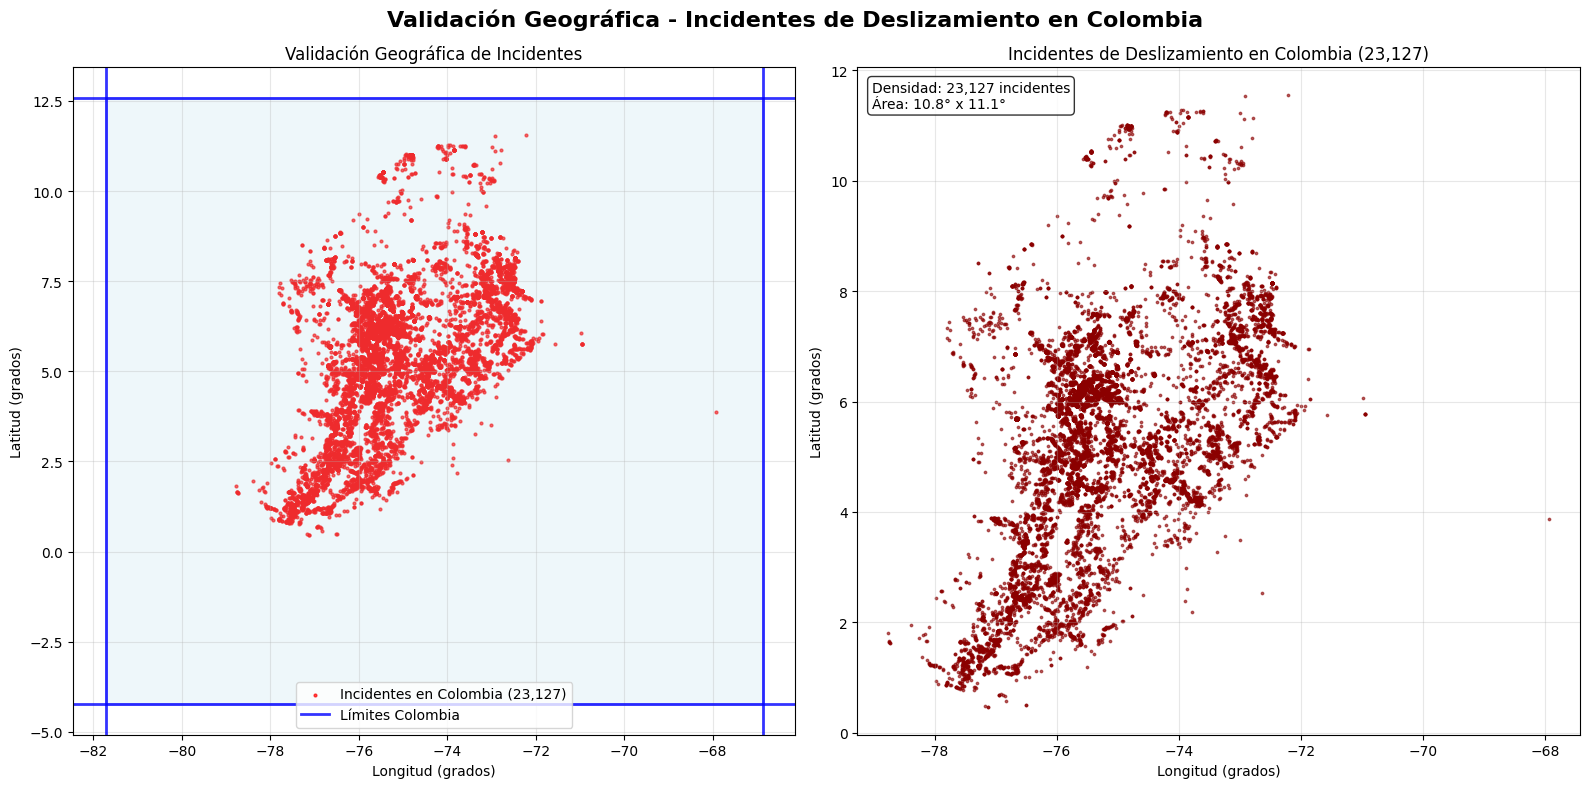


Analizando patrones regionales...

  ANÁLISIS DE PATRONES DE DESLIZAMIENTO EN COLOMBIA
Usando muestra de 5,000 incidentes para análisis regional

DISTRIBUCIÓN REGIONAL DE DESLIZAMIENTOS
--------------------------------------------------
• Andina Central: 3191 incidentes (63.8%)
• Orinoquia: 955 incidentes (19.1%)
• Andina Sur/Pacifico: 668 incidentes (13.4%)
• Caribe Oriental: 112 incidentes (2.2%)
• Caribe Occidental: 40 incidentes (0.8%)
• Amazonia: 34 incidentes (0.7%)

ANÁLISIS DE HOTSPOTS
--------------------------------------------------
• Zona de mayor actividad: 10106 incidentes en una celda de ~0.1° x 0.1°
• Coordenadas aproximadas del hotspot principal:
  - (-75.754°, 6.010°)

  PROCESO COMPLETADO EXITOSAMENTE
Resultado simplificado:
• Data cruda: 37,744 registros originales
• Data transformada: 23,127 registros procesados
• Tasa de éxito: 61.3%
• Categorías de causas finales: 8


ID    Year  Month   Day   Country Region       Department  \
0          1  1930.0   10.0  19.0  Colombia    NaN        Risaralda   
1          2  1936.0   11.0  13.0  Colombia    NaN           Boyacá   
2          3  1933.0   12.0  26.0  Colombia    NaN        Risaralda   
3          4  1938.0    5.0   8.0  Colombia    NaN        Antioquia   
4          5  1937.0   10.0   8.0  Colombia    NaN        Antioquia   
...      ...     ...    ...   ...       ...    ...              ...   
37739  37740  2020.0    9.0  15.0  Colombia    NaN        Magdalena   
37740  37741  2020.0    9.0  14.0  Colombia    NaN        Magdalena   
37741  37742  2020.0    9.0  15.0  Colombia    NaN  Valle Del Cauca   
37742  37743  2020.0    9.0  14.0  Colombia    NaN           Boyacá   
37743  37744  2020.0    9.0  16.0  Colombia    NaN            Cesar   

              Municipality                                          Place  \
0      Santa Rosa de Cabal  Km 55 del ferrocarril de Caldas (El infierno)   
1                   Mongua                                        Unknown   
2      Santa Rosa de Cabal                                         Muelas   
3                   Sonsón                                        Unknown   
4                    Nechí                                   Mina El Pato   
...                    ...                                            ...   
37739             Salamina                                       Salamina   
37740          Santa Marta                                    Santa Marta   
37741                Dagua                                          Dagua   
37742        Puerto Boyacá                                  Puerto Boyacá   
37743            San Diego                                      San Diego   

                                                Site  ...  Source 2  \
0      Km 55 del ferrocarril de Caldas (El infierno)  ...       NaN   
1                                            Unknown  ...       NaN   
2                                             Muelas  ...       NaN   
3                                            Unknown  ...       NaN   
4                                            Unknown  ...       NaN   
...                                              ...  ...       ...   
37739                                            NaN  ...       NaN   
37740                                            NaN  ...       NaN   
37741                                            NaN  ...       NaN   
37742                                            NaN  ...       NaN   
37743                                            NaN  ...       NaN   

                                              Source 3          Source 4  \
0                          El Diario (1930-10-20 pp 1)               NaN   
1                                                 ING.               NaN   
2                          El Diario (1934-01-04 pp 6)               NaN   
3      Fuente externa al Servicio Geológico Colombiano  TG/Calvete_López   
4                                        EL COLOMBIANO               NaN   
...                                                ...               ...   
37739                                              NaN               NaN   
37740                                              NaN               NaN   
37741                                              NaN               NaN   
37742                                              NaN               NaN   
37743                                              NaN               NaN   

                                                     add  \
0      Una cuadrilla de obreros se encontraba despeja...   
1                                                    NaN   
2      Fuerte invierno en todo el pa�s.Otros: comerci...   
3                                                    NaN   
4             NO SE DEFINE.(DI6Author : C.P. DI6Date : )   
...                                                  ...   
37739                                         

In [37]:
resultado = load_inventario( verbose=  True  )
## All the computations are being made with the data with incidents.
clean = resultado['incidentes_withdates']

# Crear la columna de geometría usando shapely Point
clean.loc[:,'geometry'] = clean.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)

# Convertir a GeoDataFrame
inventario_gdf = gpd.GeoDataFrame(clean, geometry='geometry')
# Asignar un sistema de referencia espacial (CRS), por ejemplo WGS84
inventario_gdf.set_crs(epsg=4326, inplace=True )

municipio - No hubo con 24 incidentes del inventario de movimento en masas.
departamento - No hubo con 9 incidentes del inventario de movimento en masas.


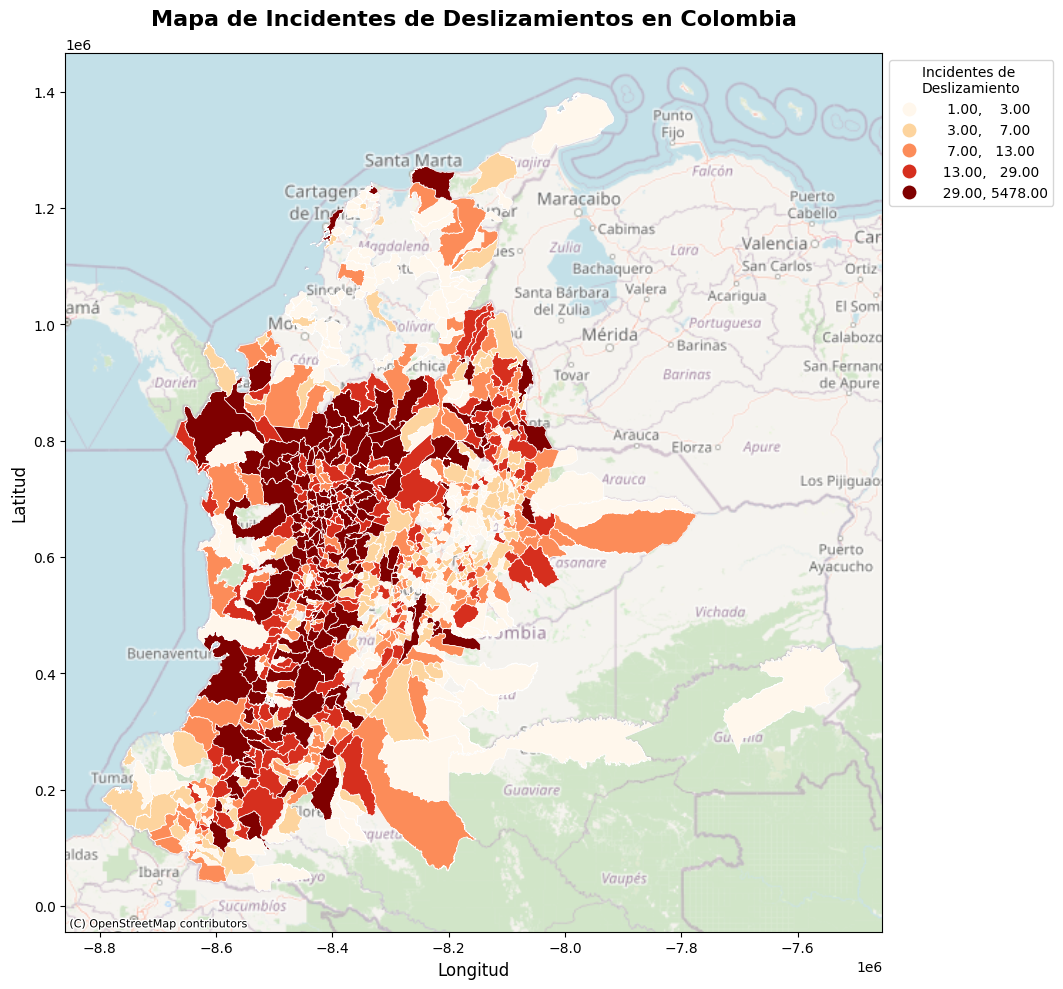

<Figure size 640x480 with 0 Axes>

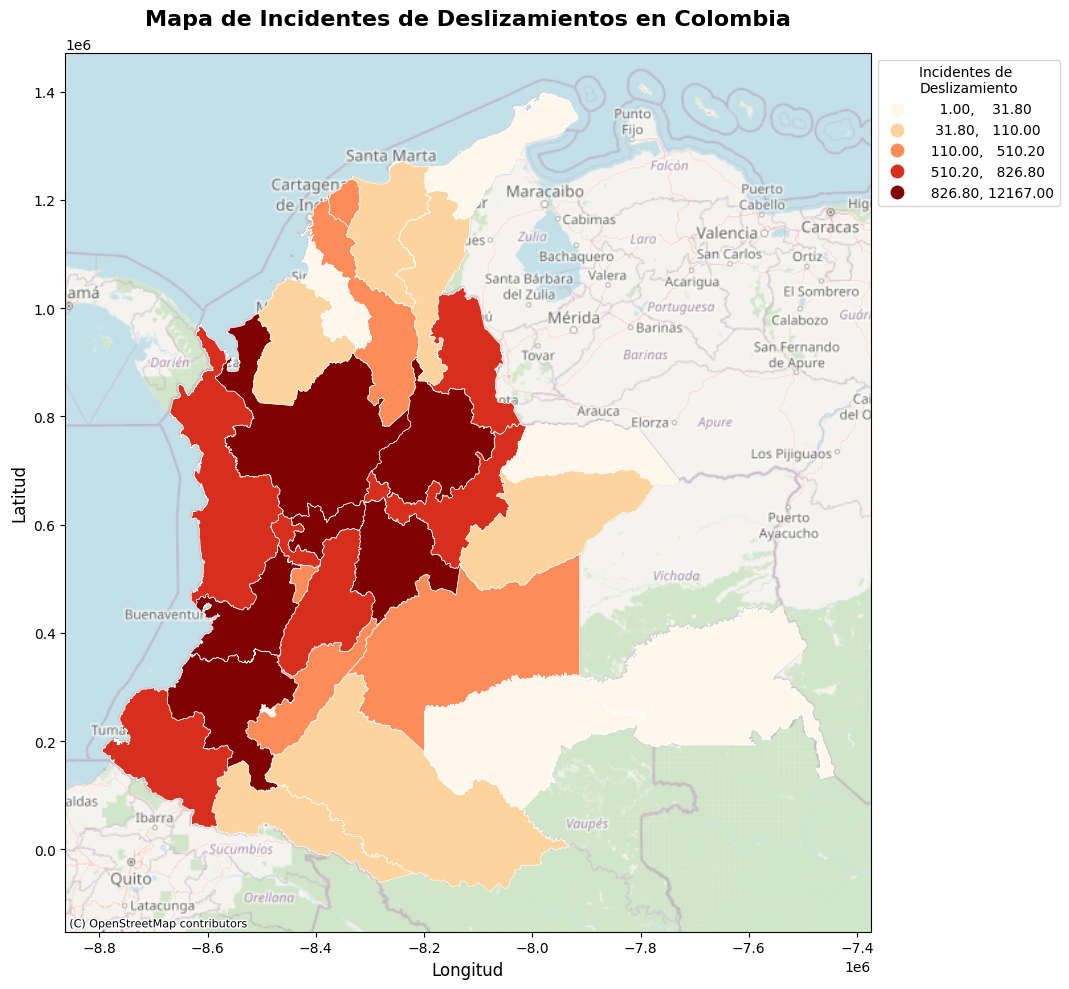

<Figure size 640x480 with 0 Axes>

In [35]:
create_cloropltes(inventario_gdf)

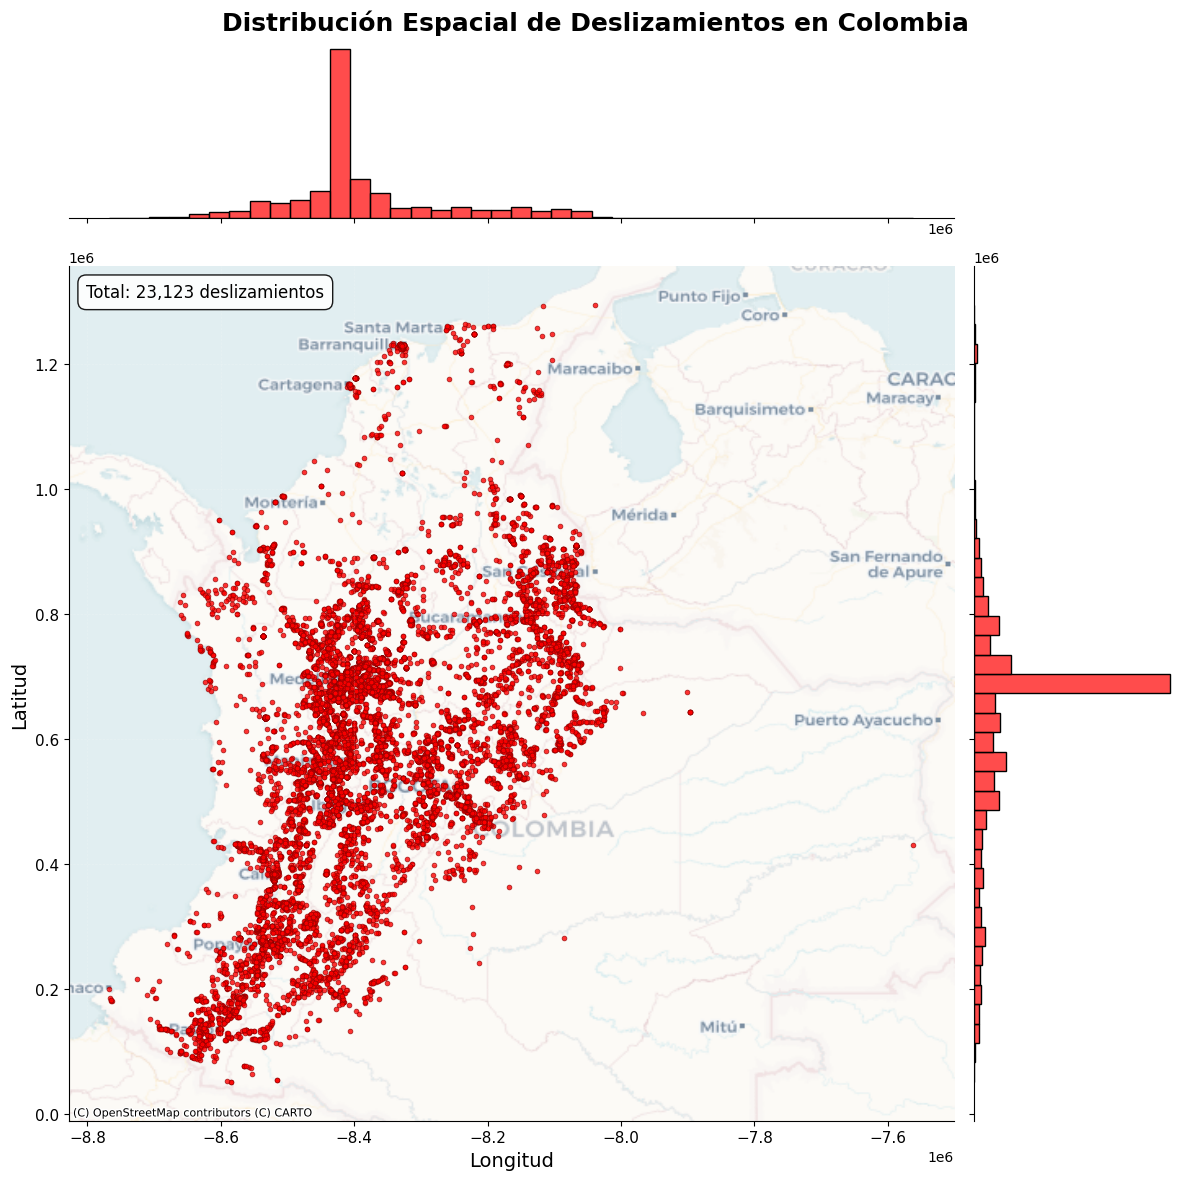

In [36]:
create_joint_plot(inventario_gdf)

## 1.2 Kernel desity function

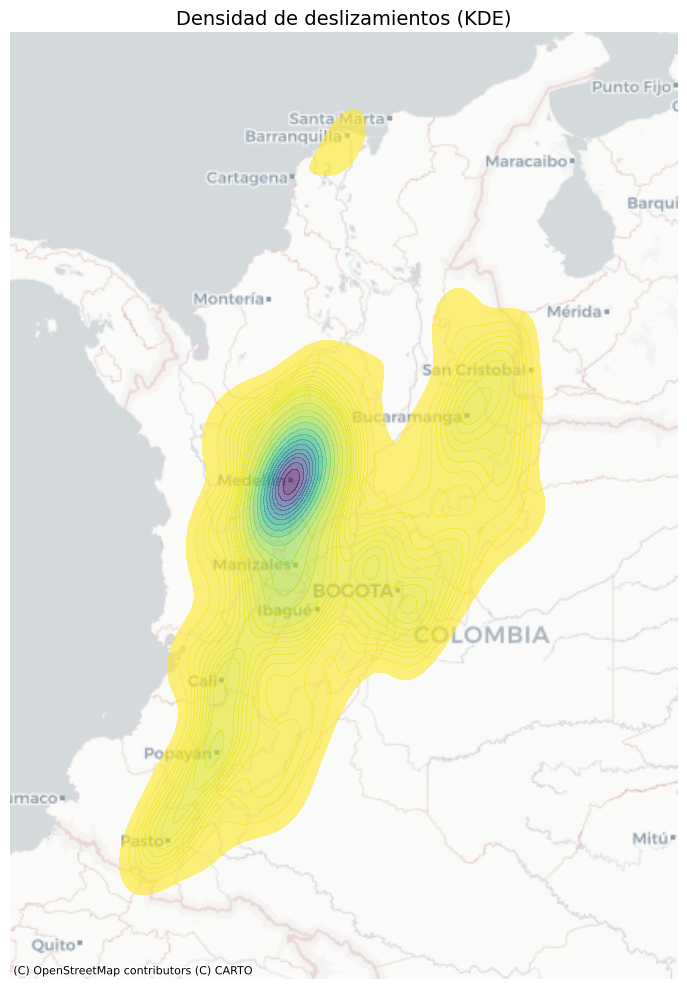

In [38]:
kdensit_points(inventario_gdf)

## 1.3 Clustering

In [2]:
from sklearn.cluster import KMeans
import numpy as np

In [3]:
# Convert to GeoDataFrame with EPSG:4326 (WGS84)
inventario_gdf = gpd.GeoDataFrame(inventario, geometry="geometry", crs="EPSG:4326")

In [4]:
inventario_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
inventario_proj = inventario_gdf.to_crs(epsg=3116)

In [6]:
inventario_proj.crs

<Projected CRS: EPSG:3116>
Name: MAGNA-SIRGAS / Colombia Bogota zone
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore between 1°30'W and 1°30'E of Bogota (approximately 75°35'W and 72°35'W of Greenwich).
- bounds: (-75.59, -2.51, -72.58, 11.82)
Coordinate Operation:
- name: Colombia MAGNA Bogota zone
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
coords = np.array([[geom.x, geom.y] for geom in inventario_proj.geometry])

In [8]:
coords

array([[ 870255.51172858, 1077757.94021042],
       [1142617.62864053, 1128857.73129664],
       [ 828574.65707031, 1030029.18018425],
       ...,
       [ 710569.79449756,  901212.09001042],
       [ 970267.09517788, 1140868.40258293],
       [1091903.10098354, 1610902.94497225]], shape=(23123, 2))

In [9]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init='auto')  
inventario_proj['Cluster'] = kmeans.fit_predict(coords)

In [10]:
inventario_kmeans = inventario_proj.to_crs(epsg=4326)

In [11]:
# Coordenadas de centroides
centroids = kmeans.cluster_centers_

In [12]:
centroids

array([[1028579.5194373 , 1044147.32867745],
       [ 835196.99918372, 1194619.39668415],
       [1086321.94782489, 1363537.41941353],
       [ 693402.78503547,  694584.80293476],
       [ 818291.52118617, 1046098.87012086],
       [ 770978.93245042,  850568.4462172 ]])

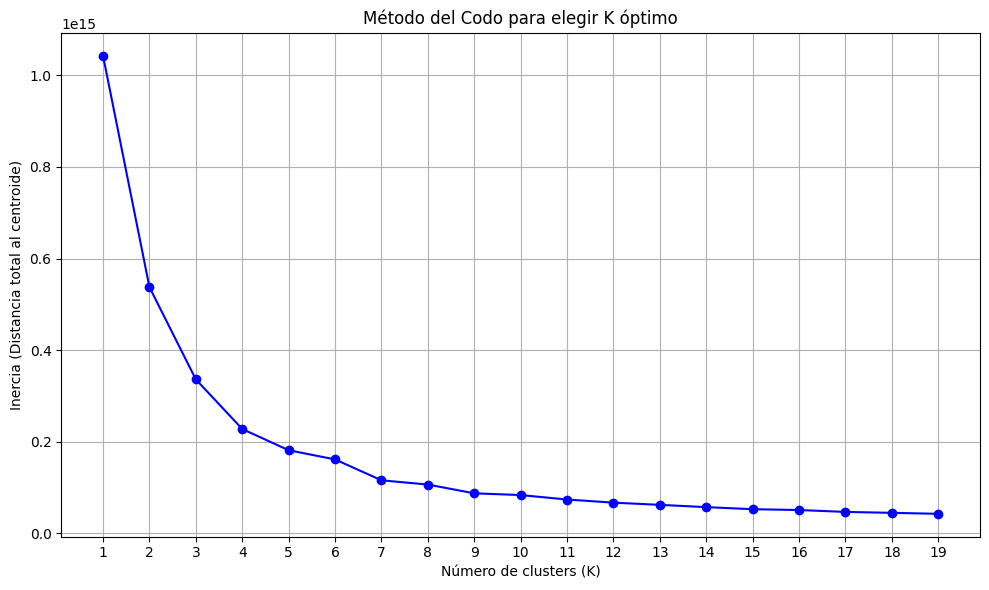

In [14]:
import matplotlib.pyplot as plt

# Extraer coordenadas como antes
coords = np.array([[geom.x, geom.y] for geom in inventario_proj.geometry])

# Probar varios valores de K
inertia = []
K_range = range(1, 20)  # Puedes ampliar si hay muchos puntos

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(coords)
    inertia.append(kmeans.inertia_)  # Suma de distancias cuadradas a los centroides

# Graficar el codo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'o-', color='blue')
plt.title('Método del Codo para elegir K óptimo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia (Distancia total al centroide)')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:


# Crear GeoDataFrame con los centroides
centroids_gdf = gpd.GeoDataFrame(
    {'Cluster': list(range(len(centroids)))},
    geometry=[Point(xy) for xy in centroids],
    crs=inventario_proj.crs
)


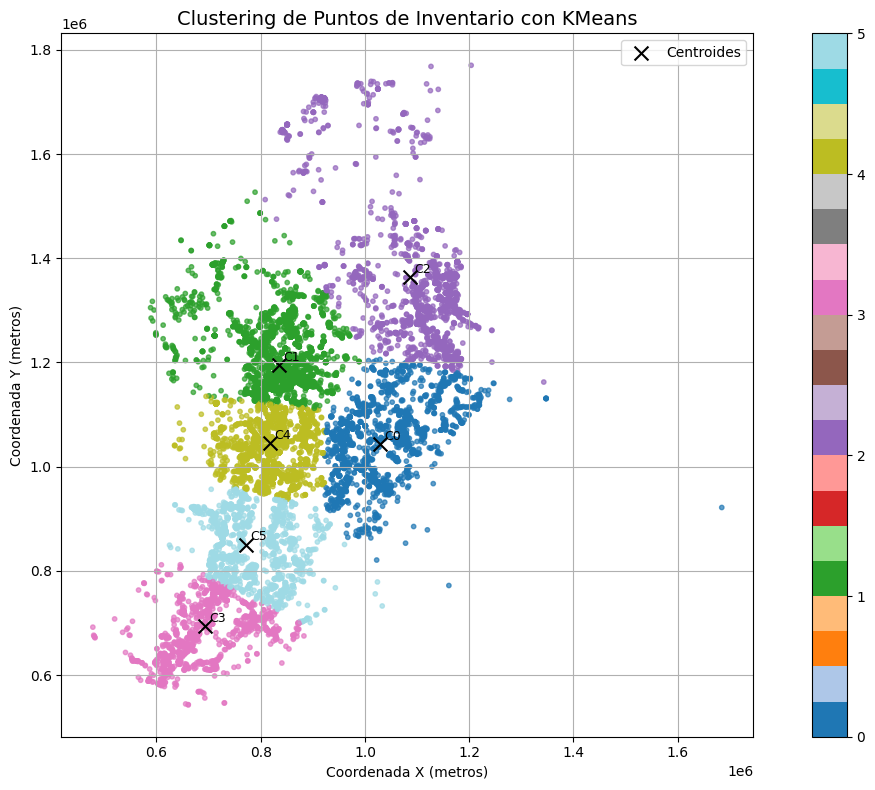

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# Puntos de inventario por cluster
inventario_proj.plot(ax=ax, column='Cluster', cmap='tab20', legend=True, markersize=10, alpha=0.7)

# Dibujar centroides
centroids_gdf.plot(ax=ax, color='black', marker='x', markersize=100, label='Centroides')

# Etiquetas de centroides
for i, row in centroids_gdf.iterrows():
    ax.annotate(f"C{i}", xy=(row.geometry.x, row.geometry.y), xytext=(3, 3), textcoords="offset points", fontsize=9, color="black")

plt.title("Clustering de Puntos de Inventario con KMeans", fontsize=14)
plt.xlabel("Coordenada X (metros)")
plt.ylabel("Coordenada Y (metros)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Seleccion de punto de forma aleatoria

El criterio es tomar puntos por fuera de un buffer de 1 Km de los deslizamientos.

In [1]:
import geopandas as gpd
import os
import pandas as pd
import numpy as np
import random
from shapely.geometry import Point
from shapely.ops import unary_union

## 2.1 Eleccion aleatoria.

In [2]:
shape_departamentos = r"C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\databases\Servicio-609\Departamentos_Abril_2025_shp\Departamento.shp"

In [3]:
file = gpd.read_file(shape_departamentos)

In [4]:
file.shape

(33, 7)

In [5]:
file.shape

(33, 7)

In [6]:
file.crs

<Projected CRS: EPSG:9377>
Name: MAGNA-SIRGAS 2018 / Origen-Nacional
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Coordinate Operation:
- name: Colombia Transverse Mercator
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia 2018
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
def generate_random_points_within_polygon(polygon, num_points):
    """Generate random points within a polygon using rejection sampling."""
    points = []
    minx, miny, maxx, maxy = polygon.bounds

    counter = 0
    
    while len(points) < num_points:
        
        if counter % 1_000 == 0:
            print(f"{counter}")
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        point = Point(x, y)
        if polygon.contains(point):
            points.append(point)
            counter+= 1

    return points


def generate_slope_filtered_points(shapefile_path, num_points=100):

    storage = r"C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\Codigo\cache_results\safe_catalog"

    if len(os.listdir(storage)) > 0:
        return None
    
    # Load Colombian departamentos shapefile
    departamentos_gdf = gpd.read_file(shapefile_path)

    # If the CRS is geographic (e.g., EPSG:4326), reproject to a projected CRS for distance and area operations
    if departamentos_gdf.crs.to_epsg() != 3116:
        departamentos_gdf = departamentos_gdf.to_crs(epsg=3116)  # MAGNA-SIRGAS / Colombia Bogotá

    # Unary union to get a single polygon
    merged_boundary = unary_union(departamentos_gdf.geometry)
    # Generate random points within the merged boundary
    random_points = generate_random_points_within_polygon(merged_boundary, num_points)
    # Create a GeoDataFrame for the points, using the same projected CRS
    gdf_points = gpd.GeoDataFrame(geometry=random_points, crs=departamentos_gdf.crs)
    # Reproject back to EPSG:4326 for slope retrieval (assumed required by DEM-based function)
    gdf_points = gdf_points.to_crs(epsg=4326)

    gdf_points = gdf_points.reset_index(drop=True)

    # Assuming your GeoDataFrame is called `gdf_points` and it's in EPSG:4326
    gdf_points["Latitud"] = gdf_points.geometry.y
    gdf_points["Longitud"] = gdf_points.geometry.x

    gdf_points.to_file(os.path.join(storage, "random_points.shp"))

    print("Done")
    
    return gdf_points

In [8]:
gdf_points = generate_slope_filtered_points(shape_departamentos, num_points = 30_000)

0
0
1000
1000
1000
2000
2000
2000
2000
2000
2000
2000
3000
3000
4000
5000
5000
5000
5000
6000
7000
8000
8000
8000
8000
9000
9000
9000
9000
10000
10000
11000
12000
12000
12000
12000
13000
13000
13000
13000
14000
14000
14000
14000
15000
15000
15000
15000
15000
16000
17000
17000
18000
18000
18000
18000
19000
20000
21000
22000
22000
22000
22000
23000
23000
23000
23000
23000
23000
24000
25000
25000
25000
26000
26000
26000
27000
28000
28000
29000
29000
29000
29000
Done


## 2.2 Cargar el catalogo de punto No-deslizamiento.

In [1]:
import os
import pandas as pd
import geopandas as gpd

In [2]:
random_points = r"C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\Codigo\cache_results\safe_catalog"

In [3]:
os.listdir(random_points)

['random_points.cpg',
 'random_points.dbf',
 'random_points.prj',
 'random_points.shp',
 'random_points.shx']

In [4]:
dictionary_bounds = {   
                    'Xmin': -78.764725,
                    'Xmax': -67.926109	,	
                    'Ymin': 0.465564,
                    'Ymax': 11.553918
                    }

random_safe_points = gpd.read_file(os.path.join(random_points ,'random_points.shp'))

In [5]:
random_safe_points

Latitud   Longitud                    geometry
0      9.329831 -73.800675   POINT (-73.80067 9.32983)
1     -2.091514 -71.561441  POINT (-71.56144 -2.09151)
2      1.073184 -73.247959   POINT (-73.24796 1.07318)
3      6.274750 -73.402965   POINT (-73.40296 6.27475)
4      3.854686 -73.557297    POINT (-73.5573 3.85469)
...         ...        ...                         ...
29995  6.108894 -68.954567   POINT (-68.95457 6.10889)
29996  5.884219 -69.221652   POINT (-69.22165 5.88422)
29997  2.467684 -69.637281   POINT (-69.63728 2.46768)
29998  4.842301 -69.217551    POINT (-69.21755 4.8423)
29999  5.665674 -74.082518   POINT (-74.08252 5.66567)

[30000 rows x 3 columns]

In [6]:
random_safe_points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
random_safe_points.shape

(30000, 3)

In [8]:
dictionary_bounds = {   
    'Xmin': -78.764725,
    'Xmax': -67.926109,	
    'Ymin':  0.465564,
    'Ymax': 11.553918
}
# Apply filter
filtered_gdf = random_safe_points[
                                    (random_safe_points["Longitud"] >= dictionary_bounds["Xmin"]) &
                                    (random_safe_points["Longitud"] <= dictionary_bounds["Xmax"]) &
                                    (random_safe_points["Latitud"]  >= dictionary_bounds["Ymin"]) &
                                    (random_safe_points["Latitud"]  <= dictionary_bounds["Ymax"])
                ].copy()

In [9]:
filtered_gdf  #.sample(500).plot()

Latitud   Longitud                   geometry
0      9.329831 -73.800675  POINT (-73.80067 9.32983)
2      1.073184 -73.247959  POINT (-73.24796 1.07318)
3      6.274750 -73.402965  POINT (-73.40296 6.27475)
4      3.854686 -73.557297   POINT (-73.5573 3.85469)
5      9.011217 -74.888142  POINT (-74.88814 9.01122)
...         ...        ...                        ...
29995  6.108894 -68.954567  POINT (-68.95457 6.10889)
29996  5.884219 -69.221652  POINT (-69.22165 5.88422)
29997  2.467684 -69.637281  POINT (-69.63728 2.46768)
29998  4.842301 -69.217551   POINT (-69.21755 4.8423)
29999  5.665674 -74.082518  POINT (-74.08252 5.66567)

[24546 rows x 3 columns]

In [10]:
path_buffer_radius = r"C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\Codigo\cache_results\inventario_1000m.shape\inventario_1000m.shp"

In [11]:
inventario = gpd.read_file(path_buffer_radius)

In [12]:
inventario.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
# Perform spatial join: find which safe points intersect the landslide buffers
joined = gpd.sjoin(
    left_df=filtered_gdf,   # The points we assumed are safe
    right_df=inventario,    # The landslide inventory polygons or buffers
    how="left",            # Keep all safe points, and check which intersect a landslide buffer
    predicate="intersects"
)


In [14]:
joined

Latitud_left  Longitud_left                   geometry  index_right  \
0          9.329831     -73.800675  POINT (-73.80067 9.32983)          NaN   
2          1.073184     -73.247959  POINT (-73.24796 1.07318)          NaN   
3          6.274750     -73.402965  POINT (-73.40296 6.27475)          NaN   
4          3.854686     -73.557297   POINT (-73.5573 3.85469)          NaN   
5          9.011217     -74.888142  POINT (-74.88814 9.01122)          NaN   
...             ...            ...                        ...          ...   
29995      6.108894     -68.954567  POINT (-68.95457 6.10889)          NaN   
29996      5.884219     -69.221652  POINT (-69.22165 5.88422)          NaN   
29997      2.467684     -69.637281  POINT (-69.63728 2.46768)          NaN   
29998      4.842301     -69.217551   POINT (-69.21755 4.8423)          NaN   
29999      5.665674     -74.082518  POINT (-74.08252 5.66567)          NaN   

       ID  Latitud_right  Longitud_right  
0     NaN            NaN             NaN  
2     NaN            NaN             NaN  
3     NaN            NaN             NaN  
4     NaN            NaN             NaN  
5     NaN            NaN             NaN  
...    ..            ...             ...  
29995 NaN            NaN             NaN  
29996 NaN            NaN             NaN  
29997 NaN            NaN             NaN  
29998 NaN            NaN             NaN  
29999 NaN            NaN             NaN  

[25799 rows x 7 columns]

In [15]:
# Keep only truly safe points (those with no match in the inventory)
true_safe_points = joined[joined['index_right'].isna()].drop(columns=['index_right','ID','Latitud_right','Longitud_right'])
true_safe_points = true_safe_points .\
                                    rename(columns = { 'Latitud_left':'Latitud', 'Longitud_left':'Longitud'  })\
                                    .drop_duplicates(subset = ['Latitud' , 'Longitud'])\
                                    .reset_index(drop = True)\
                                    

In [16]:
true_safe_points.head()

Latitud   Longitud                   geometry
0  9.329831 -73.800675  POINT (-73.80067 9.32983)
1  1.073184 -73.247959  POINT (-73.24796 1.07318)
2  6.274750 -73.402965  POINT (-73.40296 6.27475)
3  3.854686 -73.557297   POINT (-73.5573 3.85469)
4  9.011217 -74.888142  POINT (-74.88814 9.01122)

In [17]:
true_safe_points.shape

(23999, 3)

<Axes: >

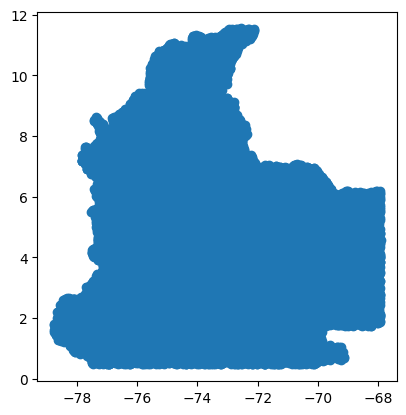

In [25]:
true_safe_points.plot()

In [18]:
true_safe_points = true_safe_points.drop(columns = 'geometry')
true_safe_points.to_csv(r"C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\Codigo\cache_results_v2\SafePoints.csv" ,index = False)

# 3. Flujo principal

In [1]:
import os
import pandas as pd
from Codigo.land_slide.main_sample import create_dataset
pd.set_option('display.max_colwidth', None)
## from Codigo.land_slide.openstreet import load_inventario

In [2]:
path_storage = r"C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\Codigo\cache_results_v2"
create_dataset(path_storage )

Amount of files 1
['SafePoints.csv']


Current Time = 28-05-2025 01:38:55


Amount points (47122, 4)

Working in CHIRPS nowcast assigment [...]

15.909 [%] progress
31.818 [%] progress
47.727 [%] progress
63.636 [%] progress
79.545 [%] progress
95.455 [%] progress
Dates complete
Coords are in aligment.
Done

Processing windows one by one to minimize memory usage...
  Processing 3-day rolling statistics...
    Calculating rolling statistics...
    Computing static summaries...
    Mapping to 47122 landslides across 18531 unique grid cells...
    Completed 3-day window and cleared memory
  Processing 7-day rolling statistics...
    Calculating rolling statistics...
    Computing static summaries...
    Mapping to 47122 landslides across 18531 unique grid cells...
    Completed 7-day window and cleared memory
  Processing 15-day rolling statistics...
    Calculating rolling statistics...
    Computing static summaries...
    Mapping to 47122 landslides across 18531 unique grid cells...
  

# 4. Analis exploratorio de variables independientes.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


use_cols = [
                'ID',
                'Latitud', 'Longitud',
               'label',
               'precip_rollsum_mean_3d', 
                'precip_rollmean_mean_3d',
               'precip_rollmax_mean_3d',
                'precip_rollsum_mean_7d',
                'precip_rollmean_mean_7d',
                'precip_rollmax_mean_7d',
                'precip_rollsum_mean_15d', 
                'precip_rollmean_mean_15d',
                'precip_rollmax_mean_15d',
                'precip_cdw_index',
                'precip_rx1day_index',
                'precip_r95p_index', 
                'precip_aggregated_index',
                'suceptilibty', 
                'PGA',
                'Litologia',
                'Pendiente_12_5m', 
                'Elevacion_12_5m'
        ]


open_street_map = pd.read_csv(r"C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\Codigo\cache_results_v2\Invenatario_1000_COMPUTED.csv")  #.sample()  ## .isna().sum()
resto_varaibles  = pd.read_csv(r"C:\Users\Usuario\Documents\AI\Semestre 1\GeoSpatial\Codigo\cache_results_v2\Inventario_raw.csv",usecols=use_cols)

common_cols = ['Latitud' , 'Longitud']

filter_cols = [col for col in resto_varaibles.columns if col not in common_cols]
training_set = pd.merge(left =open_street_map ,right = resto_varaibles[filter_cols] , on = 'ID')

In [3]:
training_set.columns 

Index(['ID', 'Latitud', 'Longitud', 'Longitud_road', 'Latitud_road',
       'road_density', 'road_min_distance', 'Longitud_river', 'Latitud_river',
       'river_density', 'river_min_distance', 'label',
       'precip_rollsum_mean_3d', 'precip_rollmean_mean_3d',
       'precip_rollmax_mean_3d', 'precip_rollsum_mean_7d',
       'precip_rollmean_mean_7d', 'precip_rollmax_mean_7d',
       'precip_rollsum_mean_15d', 'precip_rollmean_mean_15d',
       'precip_rollmax_mean_15d', 'precip_cdw_index', 'precip_rx1day_index',
       'precip_r95p_index', 'precip_aggregated_index', 'suceptilibty', 'PGA',
       'Litologia', 'Pendiente_12_5m', 'Elevacion_12_5m'],
      dtype='object')

In [4]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47122 entries, 0 to 47121
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        47122 non-null  int64  
 1   Latitud                   47122 non-null  float64
 2   Longitud                  47122 non-null  float64
 3   Longitud_road             14155 non-null  float64
 4   Latitud_road              14155 non-null  float64
 5   road_density              47122 non-null  float64
 6   road_min_distance         14155 non-null  float64
 7   Longitud_river            25567 non-null  float64
 8   Latitud_river             25567 non-null  float64
 9   river_density             47122 non-null  float64
 10  river_min_distance        25567 non-null  float64
 11  label                     47122 non-null  int64  
 12  precip_rollsum_mean_3d    47122 non-null  float64
 13  precip_rollmean_mean_3d   47122 non-null  float64
 14  precip

In [5]:
training_set.groupby(['label' ]).agg({'Pendiente_12_5m':('median','mean')})

Pendiente_12_5m           
               median       mean
label                           
0            5.111090   9.953208
1           11.527973  14.049074

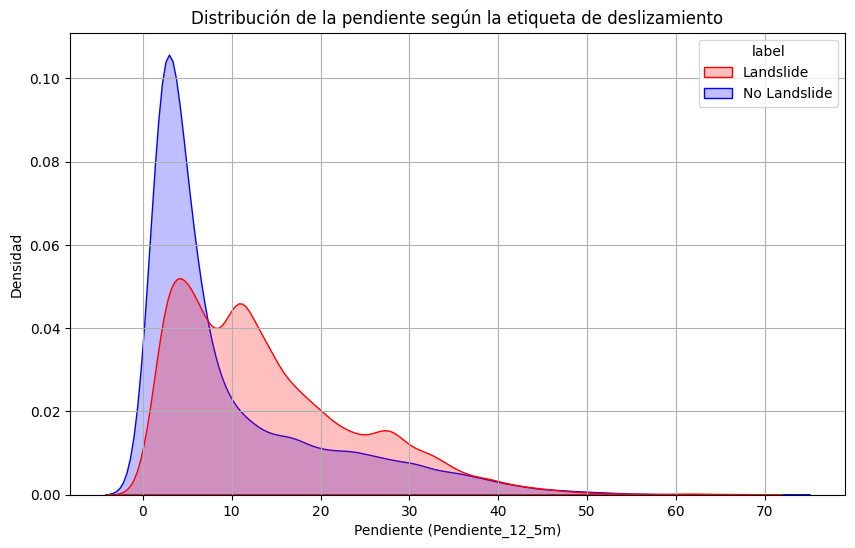

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Optional: Ensure label is treated as categorical with specific order
training_set["label"] = training_set["label"].map({0: "No Landslide", 1: "Landslide"})

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=training_set,
    x="Pendiente_12_5m",
    hue="label",
    common_norm=False,
    fill=True,
    palette={"No Landslide": "blue", "Landslide": "red"}
)

plt.title("Distribución de la pendiente según la etiqueta de deslizamiento")
plt.xlabel("Pendiente (Pendiente_12_5m)")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()



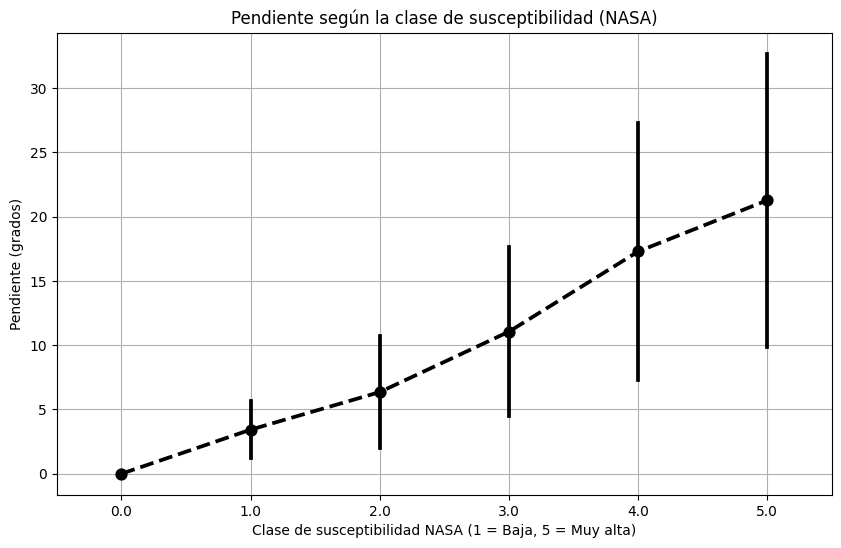

In [72]:


# Make sure the susceptibility column is categorical
training_set["suceptilibty"] = training_set["suceptilibty"].astype("category")

plt.figure(figsize=(10, 6))
sns.pointplot(
            data=training_set,
            x="suceptilibty",
            y="Pendiente_12_5m",
            errorbar="sd",   # You can also use "ci" for confidence intervals
            markers="o",
            linestyles="--",
            color="black"
        )

plt.title("Pendiente según la clase de susceptibilidad (NASA)")
plt.xlabel("Clase de susceptibilidad NASA (1 = Baja, 5 = Muy alta)")
plt.ylabel("Pendiente (grados)")
plt.grid(True)
plt.show()

In [ ]:
# Optional: Ensure label is treated as categorical with specific order
training_set["label"] = training_set["label"].map({0: "No Landslide", 1: "Landslide"})

## PGA 

Peak Ground Accelaration

The  Global Earthquake Model (GEM) Global Seismic Hazard Map (version 2023.1)
depicts the geographic distribution of the Peak Ground Acceleration (PGA) in 
terms of fraction of the acceleration of gravity, with a 10% probability of 
being exceeded in 50 years, computed for reference rock conditions (shear wave
velocity, Vs30, of 760-800 m/s). The map was created by collating maps computed
using national and regional probabilistic seismic hazard models developed by 
various institutions and projects, in collaboration with GEM Foundation 
scientists.

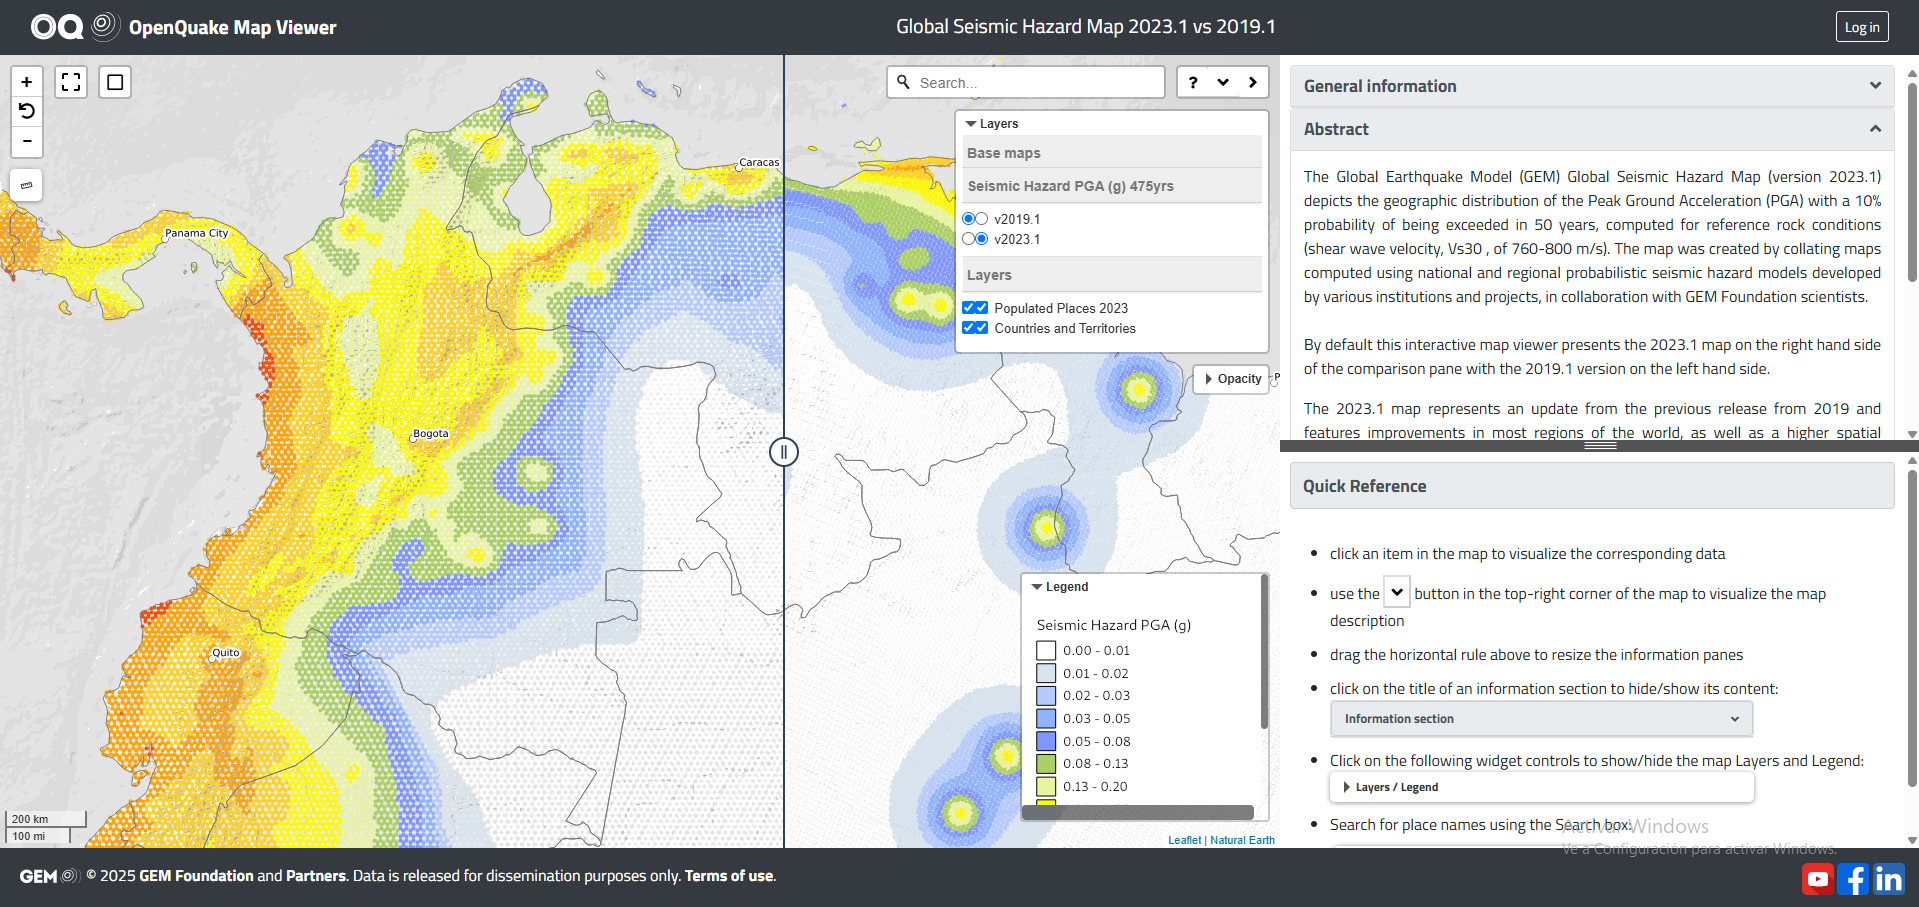

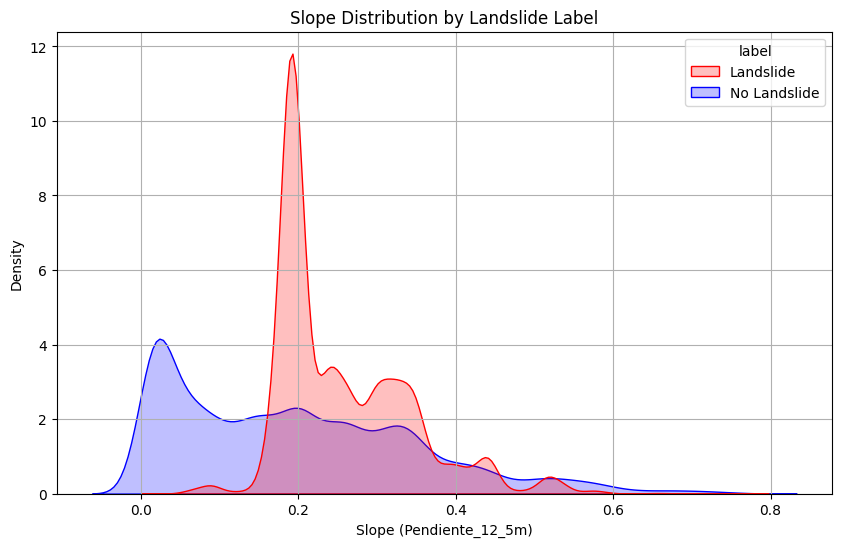

In [63]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=training_set,
    x="PGA",
    hue="label",
    common_norm=False,
    fill=True,
    palette={"No Landslide": "blue", "Landslide": "red"}
)

plt.title("Distribución de la Aceleración Máxima del Suelo (PGA) por presencia de deslizamiento")
plt.xlabel("PGA (fracción de la aceleración de la gravedad)")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()

## Densidad rios - vias

In [8]:
training_set.groupby(['label' ]).agg({'river_density':('median','mean'),'road_density':('median','mean')})

river_density           road_density          
                    median      mean       median      mean
label                                                      
Landslide         1.001708  1.026086     0.516538  1.153606
No Landslide      0.000000  0.215627     0.000000  0.018437

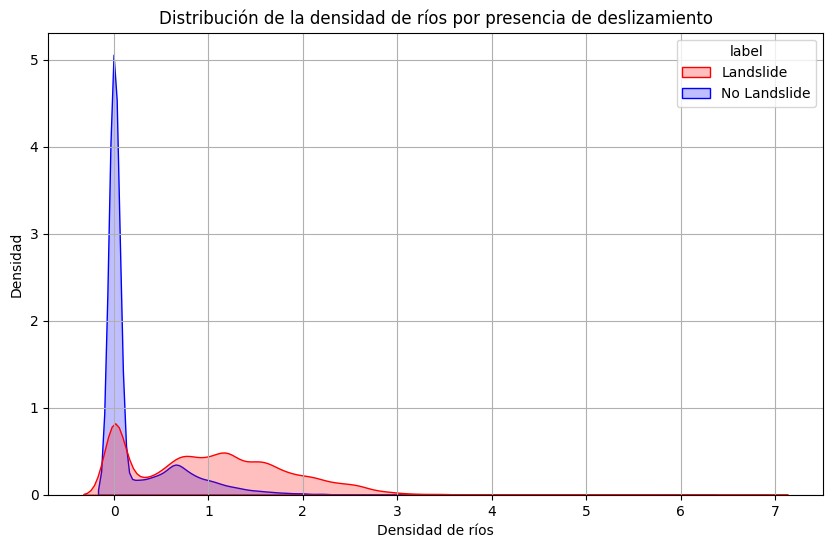

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=training_set,
    x="river_density",    
    hue="label",
    common_norm=False,
    fill=True,
    palette={"No Landslide": "blue", "Landslide": "red"}
)

plt.title("Distribución de la densidad de ríos por presencia de deslizamiento")
plt.xlabel("Densidad de ríos")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()

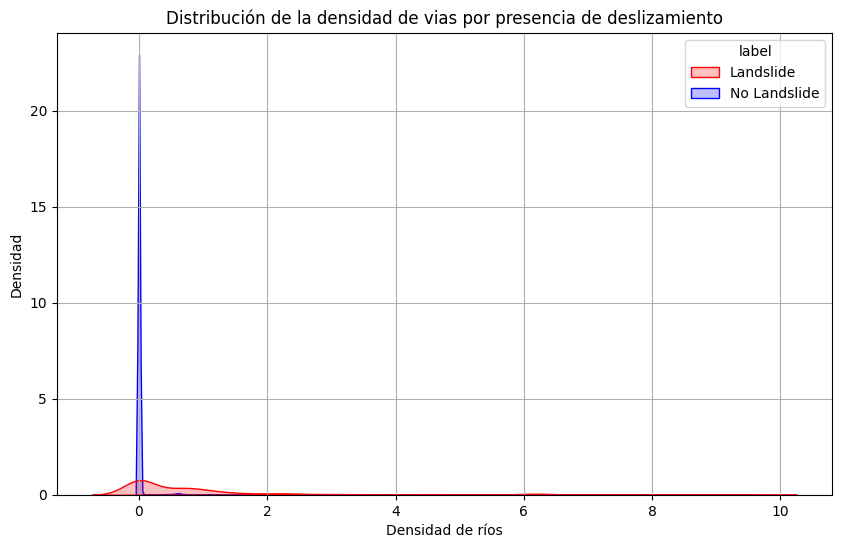

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
            data=training_set,
            x="road_density",    
            hue="label",
            common_norm=False,
            fill=True,
            palette={"No Landslide": "blue", "Landslide": "red"}
        )

plt.title("Distribución de la densidad de vias por presencia de deslizamiento")
plt.xlabel("Densidad de ríos")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()

#### Sin outliers

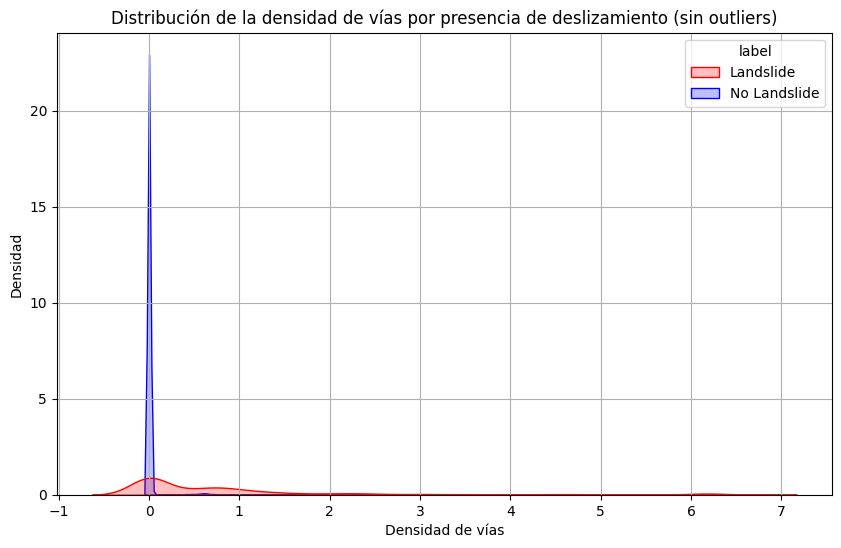

In [11]:
# Definir percentiles para eliminar outliers
lower_bound = training_set['road_density'].quantile(0.01)
upper_bound = training_set['road_density'].quantile(0.99)

# Filtrar datos sin outliers
df_filtered = training_set[
    (training_set['road_density'] >= lower_bound) & 
    (training_set['road_density'] <= upper_bound)
]

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_filtered,
    x="road_density",
    hue="label",
    common_norm=False,
    fill=True,
    palette={"No Landslide": "blue", "Landslide": "red"}
)

plt.title("Distribución de la densidad de vías por presencia de deslizamiento (sin outliers)")
plt.xlabel("Densidad de vías")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()


## Precipitacion acumulada

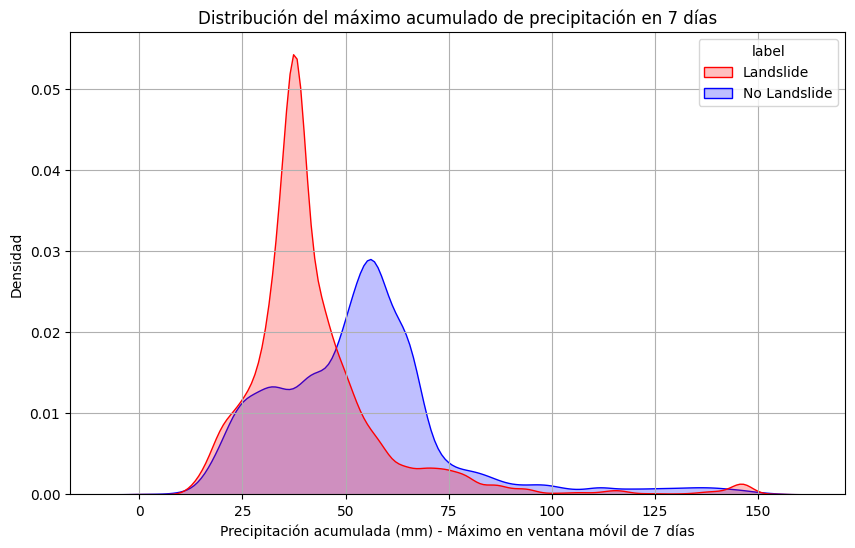

In [68]:

plt.figure(figsize=(10, 6))
sns.kdeplot(
            data=training_set,
            x="precip_rollsum_mean_7d",
            hue="label",
            common_norm=False,
            fill=True,
            palette={"No Landslide": "blue", "Landslide": "red"}
        )

plt.title("Distribución del máximo acumulado de precipitación en 7 días")
plt.xlabel("Precipitación acumulada (mm) - Máximo en ventana móvil de 7 días")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()

## Litologia - SGC

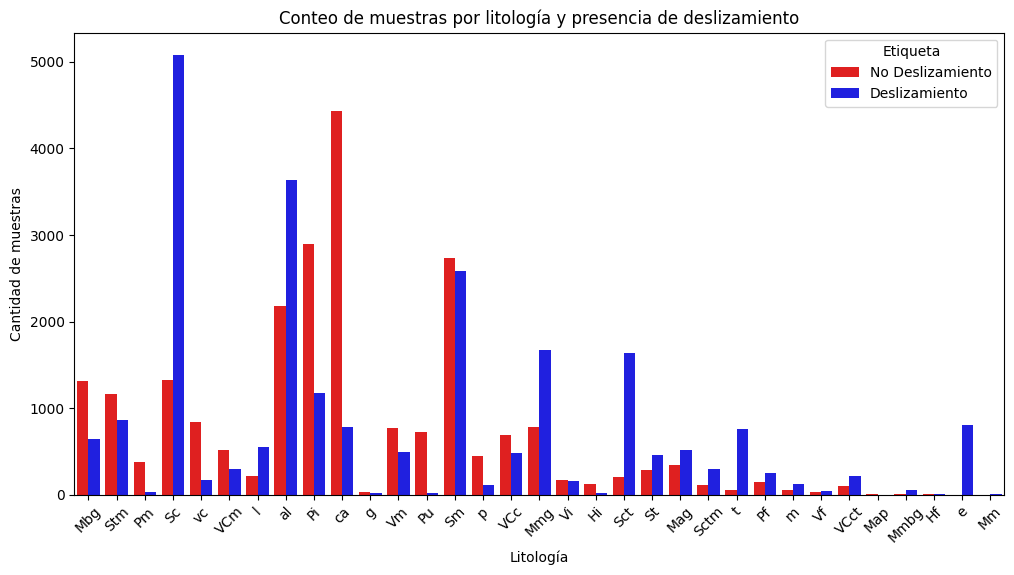

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=training_set, x='Litologia', hue='label', palette={'No Landslide': 'blue', 'Landslide': 'red'})

plt.title('Conteo de muestras por litología y presencia de deslizamiento')
plt.xlabel('Litología')
plt.ylabel('Cantidad de muestras')
plt.xticks(rotation=45)  # rota etiquetas si hay muchas categorías
plt.legend(title='Etiqueta', labels=['No Deslizamiento', 'Deslizamiento'])
plt.show()

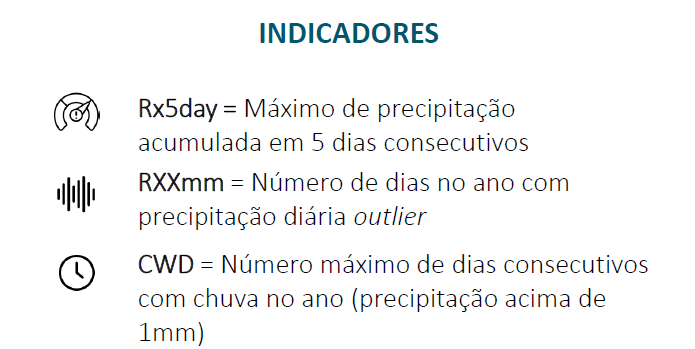

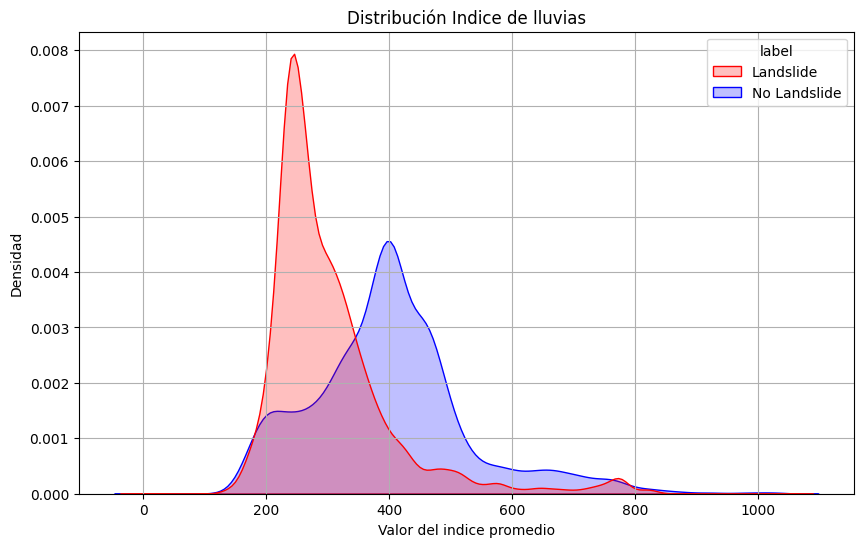

In [13]:

plt.figure(figsize=(10, 6))
sns.kdeplot(
            data=training_set,
            x="precip_aggregated_index",
            hue="label",
            common_norm=False,
            fill=True,
            palette={"No Landslide": "blue", "Landslide": "red"}
        )

plt.title("Distribución Indice de lluvias")
plt.xlabel("Valor del indice promedio")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()

# 5. Pasos a continuar
Los próximos pasos consisten en aplicar indicadores climáticos de precipitación, siguiendo la metodología recomendada para la evaluación del riesgo climático. En particular, se usarán indicadores que caracterizan eventos extremos de lluvia asociados a tormentas, basados en las proyecciones climáticas del IPCC y los modelos CMIP6.

Entre los indicadores a emplear se encuentran:

Rx1day: Máximo de precipitación acumulada en un solo día.

R99p: Precipitación total anual correspondiente a los días en los que la lluvia superó el percentil 99, identificando eventos extremos.

WX1day: Máxima velocidad del viento en un día.